# Python Developers Survey roku 2017

In [1]:
import pandas
import itertools
import matplotlib
%matplotlib inline
data = pandas.read_csv('data/pythondevsurvey2017_raw_data.csv', index_col=None)
#data

Kolik lidí celkem vyplnilo dotazník?

In [2]:
len(data)

9506

Kolik z respondentů aktuálně používá Python v nějakém projektu?

In [3]:
datapy = data.loc[data["Is Python the main language you use for your current projects?"] != "No, I don’t use Python for my current projects"]
len(datapy)

8112

Kolik Pythonistů z Česka odpovědělo na dotazník? Kolik ze Slovenska?

In [4]:
len(datapy.loc[datapy["What country do you live in?"]=="Czech Republic"])

59

Kolik ze Slovenska?

In [5]:
len(datapy.loc[datapy["What country do you live in?"]=="Slovakia"])

30

Kolik Pythonistů používá i staticky typované jazyky?

In [6]:
statics = ["Java","C/C++","C#","Objective-C","Go","Scala","SQL","Kotlin", "Swift", "Rust", "TypeScript"]
statics_df = []
for static in statics:
    statics_df.append(datapy.loc[datapy[static + ":What other language(s) do you use?"]==static])
statics_df = pandas.concat(statics_df).drop_duplicates().reset_index(drop=True)
len(statics_df)

6129

Kolik Pythonistů používá i ostatní dynamicky typované jazyky (tedy kromě Pythonu samotného)?

In [7]:
dynamics = ["JavaScript", "PHP", "Ruby", "Bash / Shell", "Visual Basic", "R", "Clojure", "Perl", "Groovy", "CoffeeScript"]
dynamics_df = []
for dynamic in dynamics:
    dynamics_df.append(datapy.loc[datapy[dynamic + ":What other language(s) do you use?"]==dynamic])
dynamics_df = pandas.concat(dynamics_df).drop_duplicates().reset_index(drop=True)
len(dynamics_df)

5899

Kolik Pythonistů používá jak staticky typované tak dynamicky typované jazyky?

In [8]:
len(statics_df.merge(dynamics_df))

4665

Vykreslete graf, který pro každý další jazyk ukáže procento Pythonistů, kteří:

    pracují pouze na jednom projektu,
    pracují na jednom hlavním a několika vedlejších projektech,
    pracují na více projektech.

Jazyky, které dotazník nezmiňuje („Ostatní“) ignorujte. Zobrazte ale i informace pro „Pouze Python“.

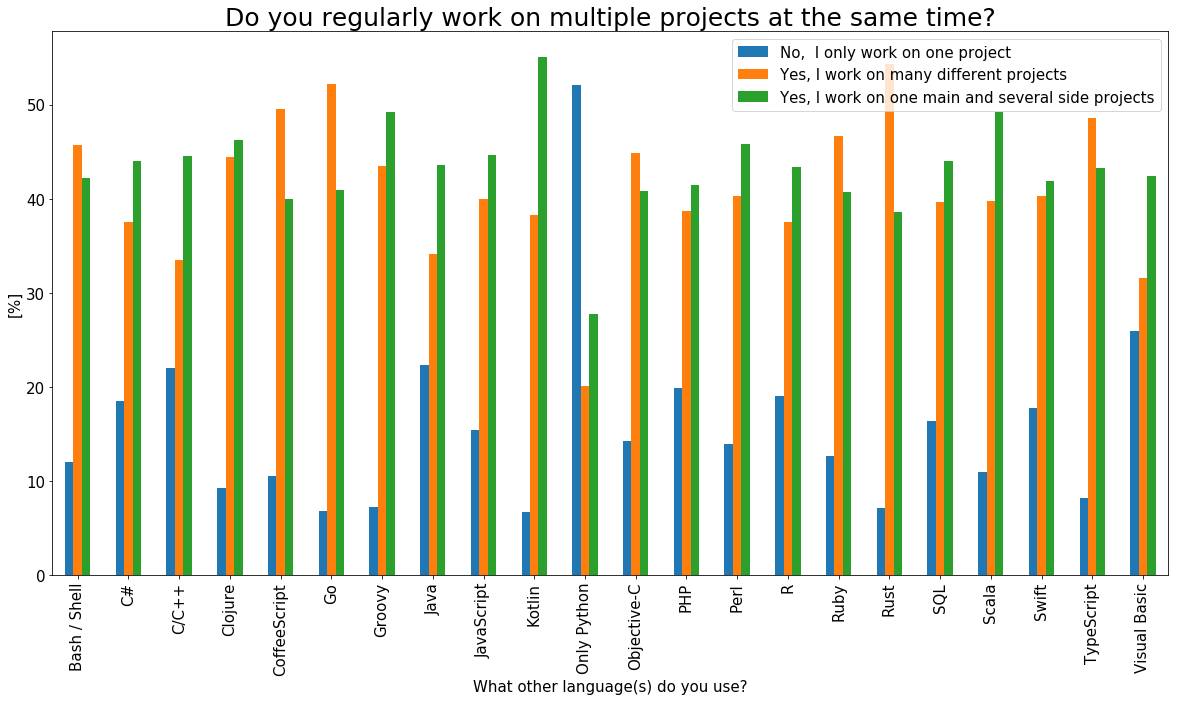

In [9]:
# Pick data
none = ["None"]
languages = none + statics + dynamics
languages_dfs = []
for language in languages:
    languages_dfs.append(datapy.groupby(["Do you\xa0regularly work on multiple projects at the same time?", 
                                         language + ":What other language(s) do you use?"]).count().iloc[:,135].apply(lambda x: 100 * x / 100))
languages_df = pandas.DataFrame(pandas.concat(languages_dfs))
languages_df = languages_df.unstack("Do you\xa0regularly work on multiple projects at the same time?")

# Per cents
for i in range(len(languages)):
    sum = languages_df.iloc[i][0]+languages_df.iloc[i][1]+languages_df.iloc[i][2]
    languages_df.iloc[i][0] = 100 * languages_df.iloc[i][0] / sum
    languages_df.iloc[i][1] = 100 * languages_df.iloc[i][1] / sum
    languages_df.iloc[i][2] = 100 * languages_df.iloc[i][2] / sum
    
# None -> Only Python
languages_df.index = [ind.replace('None', 'Only Python') for ind in languages_df.index]

# Plot
ax = languages_df.plot.bar(figsize=(20,10), fontsize=15, title="Do you regularly work on multiple projects at the same time?")
#ax.title("Do you regularly work on multiple projects at the same time?")
#ax.set_title(fontsize=15)
ax.title.set_size(25)
ax.set_xlabel("What other language(s) do you use?", fontsize=15)
ax.set_ylabel("[%]", fontsize=15)
ax.legend(["No,  I only work on one project", "Yes, I work on many different projects","Yes, I work on one main and several side projects"], fontsize=15);

In [10]:
# (useless) NOTES 
#
#languages = statics + dynamics
#languages = ["Java"] #
#for language in languages:
#    selection = datapy.loc[datapy[language + ":What other language(s) do you use?"]==language]
#    total = len(selection)
#    #selection_one = selection.iloc[:,135]=="No,  I only work on one project"
#    selection_one = selection.loc[selection["Do you\xa0regularly work on multiple projects at the same time?"]=="No,  I only work on one project"]
#    one = len(selection_one)
#    selection_different = selection.loc[selection["Do you\xa0regularly work on multiple projects at the same time?"]=="Yes, I work on many different projects"]
#    different = len(selection_different)
#    selection_side = selection.loc[selection["Do you\xa0regularly work on multiple projects at the same time?"]=="Yes, I work on one main and several side projects"]
#    side = len(selection_side)
    
#selection.iloc[:,135]
#[total,one,different,side]
#[total,one+different+side]